#### First Model of maching learning
##### Linear regerssion problem

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #use to split data set into training and testing data
import matplotlib as plt
import seaborn as sns # another data visulation package based on matplotlib

In [2]:
#reading data from file
data_file = pd.read_csv('USA_Housing.csv')
data_file.head #checking the data correct or not read top 5 data.

<bound method NDFrame.head of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0           

In [5]:
data_file.info #checking information of data and checking missing and null values

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

In [4]:
data_file.describe #some stats of data

<bound method NDFrame.describe of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0       

### checking corelation using heatmap

<AxesSubplot:>

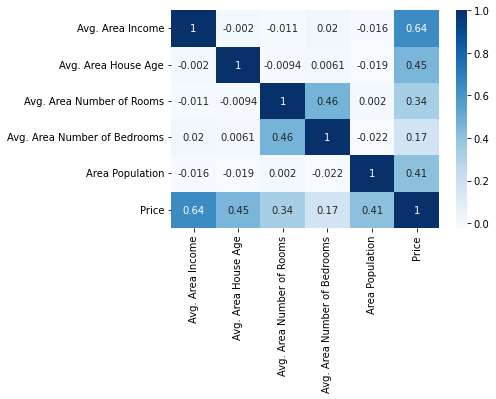

In [9]:
sns.heatmap(data_file.corr(),annot=True,cmap='Blues') #checking corelation.

In [10]:
data_file.columns #printing the columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Preparing of data set input and output


In [12]:
#excluding address from the data because it is string type.
#excluding price from the data as it will be used as label and dependent variable.
#creating x data.
x = data_file[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms',
'Avg. Area Number of Bedrooms','Area Population']]


In [13]:
# Preparing Label
y = data_file['Price']

In [14]:
''''
X_train is data for Training
X_teat is data for testing
Y_label is label for training
Y_test are label for testing with which we all compare our predictions ,
split happens randomly, so the remain state has been fixed so that we get exactly same label 
whenever we run this code , this parameters can be changed or even excluded
Splitting data such that 30% of data is test data 70% is training data set.
'''
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=101)


"'\n"

#### Import linear regression model from sklearn

In [15]:
#as linear regression model fall into inear model family
from sklearn.linear_model import LinearRegression

In [16]:
#intiliazing estimator
lm = LinearRegression(fit_intercept=True)

### Training the data